# Problem statement

To predict the interest category deponding upon the features given.

# What is the use of predicting the interest_rate?
On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information.


# Data Taken to solve the problem
There are three category so basically a multi class classification problem. The dataset has 164309 rows and 14 columns. The attributes present in the column are :
1. Loan Id- The unique id given to each customer
2. Loan_amount_requested- The listed amount of the loan applied for by the borrower.
3. Length Employed-Employment length in years
4. home owner -	The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.
5. income-verified-	Indicates if income was verified, not verified, or if the income source was verified.
6. Purpose_Of_Loan- A category provided by the borrower for the loan request. 
7. Debt_To_Income -A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
8. Inquiries_Last_6Mo- The number of inquiries by creditors during the past 6 months.
9. Months_Since_Deliquency- The number of months since the borrower's last delinquency.
10. Number_Open_Accounts -The number of open credit lines in the borrower's credit file.
11. Total_Accounts- The total number of credit lines currently in the borrower's credit file
12. Gender- Gender
13. Interest_Rate- Target Variable: Interest Rate category (1/2/3) of the loan application

# understanding and preparation of data



In [213]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [328]:
train=pd.read_csv('C:/Users/HP-PC/Desktop/Analytics Vidya/Banking_competition/train_fNxu4vz.csv')
test=pd.read_csv('C:/Users/HP-PC/Desktop/Analytics Vidya/Banking_competition/test_fjtUOL8.csv')


In [400]:
train.head()



,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,accounts
0,7000,1,Rent,11.127278,not verified,car,18.37,0,0.0,9,14,Female,1,1.791759
1,30000,4,Mortgage,2.489140,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,2.564949
2,24725,7,Mortgage,11.232780,VERIFIED - income source,debt_consolidation,15.88,0,0.0,12,16,Male,3,1.609438
3,16000,1,Others,10.935978,VERIFIED - income source,debt_consolidation,14.34,3,0.0,16,22,Male,3,1.945910
4,17000,8,Own,11.472114,VERIFIED - income source,debt_consolidation,22.17,1,0.0,19,30,Female,1,2.484907


In [401]:
test.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,accounts
0,27500,10,Mortgage,11.767575,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male,1.791759
1,26000,10,Others,11.608245,not verified,credit_card,11.37,0,0.0,6,23,Male,2.564949
2,6075,1,Rent,11.225257,VERIFIED - income,debt_consolidation,6.83,2,0.0,5,20,Male,1.609438
3,12000,10,Mortgage,11.198228,VERIFIED - income source,debt_consolidation,7.76,0,0.0,6,8,Male,1.945910
4,35000,1,Mortgage,11.957618,not verified,debt_consolidation,9.62,0,26.0,9,21,Male,2.484907


In [402]:
train.shape

(164309, 14)

1. There is missing values present in the dataset.
2. There is symbols used in the dataset.

In [403]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
Loan_Amount_Requested      164309 non-null int32
Length_Employed            164309 non-null object
Home_Owner                 164309 non-null object
Annual_Income              164309 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    164309 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
accounts                   164309 non-null float64
dtypes: float64(4), int32(1), int64(4), object(5)
memory usage: 16.9+ MB


The missing values are present in the months_since_Deliquency,annual income ,home owner,length_emloyed.

In [329]:
train.drop(['Loan_ID'],axis=1,inplace=True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [331]:
train['Loan_Amount_Requested']=train['Loan_Amount_Requested'].str.replace(",","").astype(int)
train['Length_Employed']=train['Length_Employed'].str.replace("years","")
train['Length_Employed']=train['Length_Employed'].str.replace("+","")
train['Length_Employed']=train['Length_Employed'].str.replace("<","")
train['Length_Employed']=train['Length_Employed'].str.replace("year","")
test['Loan_Amount_Requested']=test['Loan_Amount_Requested'].str.replace(",","").astype(int)
test['Length_Employed']=test['Length_Employed'].str.replace("years","")
test['Length_Employed']=test['Length_Employed'].str.replace("+","")
test['Length_Employed']=test['Length_Employed'].str.replace("<","")
test['Length_Employed']=test['Length_Employed'].str.replace("year","")
test['Home_Owner']=test['Home_Owner'].replace('None','Other')
train['Home_Owner']=train['Home_Owner'].replace('None','Other')


In [332]:
#To deal with missing values
train['Annual_Income']=train['Annual_Income'].fillna(dataset['Annual_Income'].median())
test['Annual_Income']=test['Annual_Income'].fillna(data_test['Annual_Income'].median())
#dataset['Months_Since_Deliquency']=dataset['Months_Since_Deliquency'].fillna(0)
test['Months_Since_Deliquency']=test['Months_Since_Deliquency'].fillna(0)
train['Length_Employed']=train['Length_Employed'].fillna(0)
test['Length_Employed']=test['Length_Employed'].fillna(0)
train['Home_Owner']=train['Home_Owner'].fillna('Others')
test['Home_Owner']=test['Home_Owner'].fillna('Others')

# Data Visualization

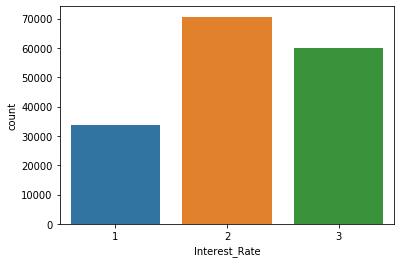

In [404]:
#the total count of each interest category
sns.countplot(train['Interest_Rate'])#There is less number of people belonging to category-1 than  and 3

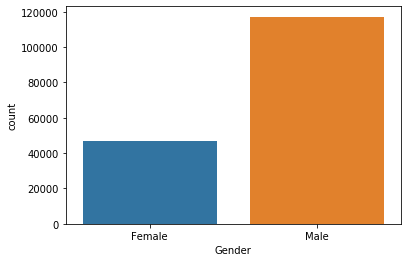

In [405]:
sns.countplot(train['Gender'])

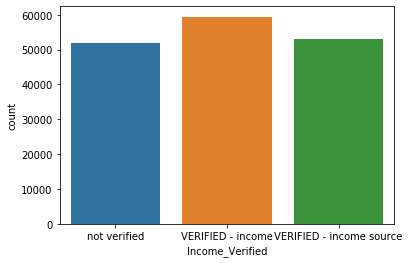

In [406]:
sns.countplot(train['Income_Verified'])

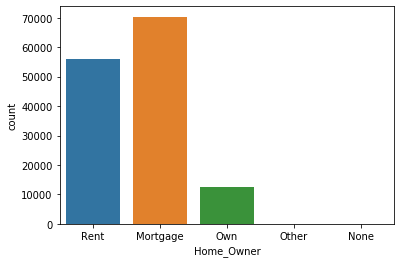

In [194]:
sns.countplot(dataset['Home_Owner'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

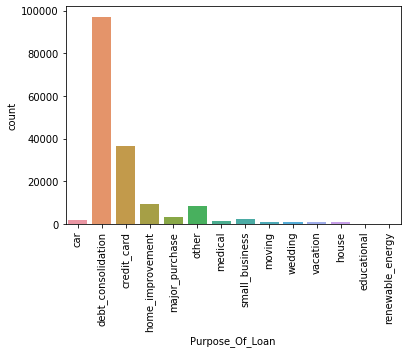

In [63]:
sns.countplot(dataset['Purpose_Of_Loan'])
plt.xticks(rotation=90)

In [407]:
#to convert to numerical value
train['Gender']=pd.get_dummies(dataset['Gender'],drop_first=True)
test['Gender']=pd.get_dummies(data_test['Gender'],drop_first=True)

In [297]:
data=pd.get_dummies(train['Income_Verified'],drop_first=True)
train['Income_verified']=data['VERIFIED - income source']
train['not_verified']=data['not verified']
data=pd.get_dummies(test['Income_Verified'],drop_first=True)
test['Income_verified']=data['VERIFIED - income source']
test['not_verified']=data['not verified']

In [303]:
data_H=pd.get_dummies(dataset['Home_Owner'],drop_first=True)
dataset['other']=data_H['Other']
dataset['Own']=data_H['Own']
dataset['Rent']=data_H['Rent']
data_H=pd.get_dummies(data_test['Home_Owner'],drop_first=True)
data_test['other']=data_H['Other']
data_test['Own']=data_H['Own']
data_test['Rent']=data_H['Rent']

# Normalizing 

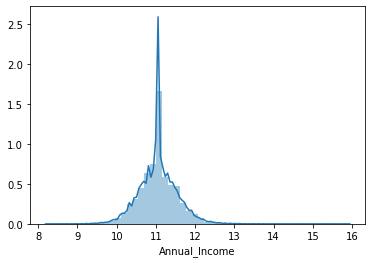

In [162]:
sns.distplot(np.log1p(train['Annual_Income']))

In [304]:
train['Annual_Income']=np.log1p(train['Annual_Income'])
test['Annual_Income']=np.log1p(test['Annual_Income'])

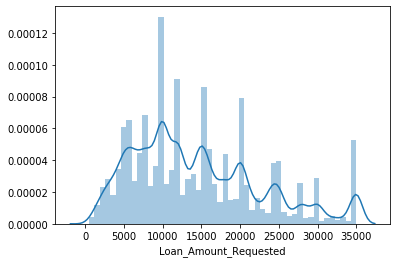

In [164]:
sns.distplot(train['Loan_Amount_Requested'])

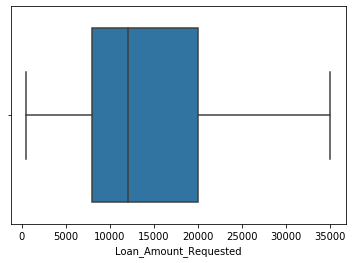

In [165]:
sns.boxplot(train['Loan_Amount_Requested'])

In [305]:
train['Loan_Amount_Requested']=np.log1p(train['Loan_Amount_Requested'])
test['Loan_Amount_Requested']=np.log1p(test['Loan_Amount_Requested'])

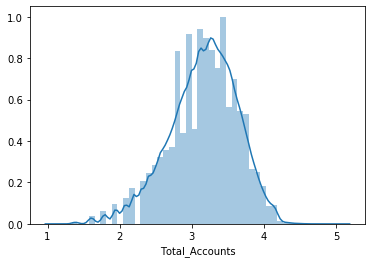

In [167]:
sns.distplot(np.log1p(train['Total_Accounts']))

In [306]:
train['Total_Accounts']=np.log1p(train['Total_Accounts'])
test['Total_Accounts']=np.log1p(test['Total_Accounts'])

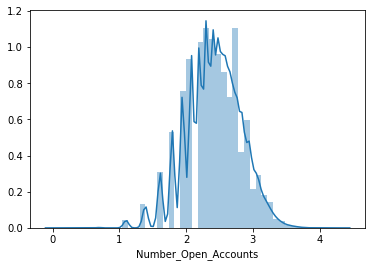

In [169]:
sns.distplot(np.log1p(train['Number_Open_Accounts']))

In [307]:
train['Number_Open_Accounts']=np.log1p(train['Number_Open_Accounts'])
test['Number_Open_Accounts']=np.log1p(test['Number_Open_Accounts'])

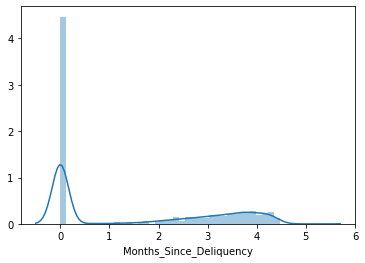

In [185]:
sns.distplot(np.log1p(train['Months_Since_Deliquency']))

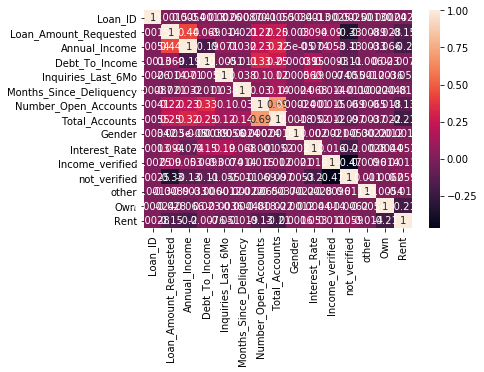

In [204]:
sns.heatmap(train.corr(),annot=True)

In [308]:
x=train[['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Total_Accounts','Inquiries_Last_6Mo','Gender','Income_verified','not_verified','Months_Since_Deliquency','other','Own','Rent']]

In [309]:
x.shape

(164309, 12)

In [310]:
y=train['Interest_Rate']

In [312]:
scale=StandardScaler()
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [313]:
y_train.shape

(131447,)

# using Random Forest Classifier

In [314]:

model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# using catboost with K-Fold

In [327]:
from catboost import CatBoostClassifier

In [336]:
train['accounts']=train['Total_Accounts']-train['Number_Open_Accounts']
test['accounts']=train['Total_Accounts']-train['Number_Open_Accounts']

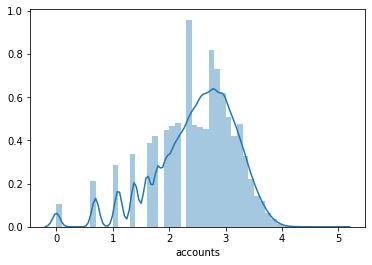

In [340]:
sns.distplot(np.log1p(train['accounts']))

In [341]:
train['accounts']=np.log1p(train['accounts'])
test['accounts']=np.log1p(test['accounts'])

In [370]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 13 columns):
Loan_Amount_Requested      109541 non-null int32
Length_Employed            109541 non-null object
Home_Owner                 109541 non-null object
Annual_Income              109541 non-null float64
Income_Verified            109541 non-null object
Purpose_Of_Loan            109541 non-null object
Debt_To_Income             109541 non-null float64
Inquiries_Last_6Mo         109541 non-null int64
Months_Since_Deliquency    109541 non-null float64
Number_Open_Accounts       109541 non-null int64
Total_Accounts             109541 non-null int64
Gender                     109541 non-null object
accounts                   109541 non-null float64
dtypes: float64(4), int32(1), int64(3), object(5)
memory usage: 10.4+ MB


In [343]:
#training
train_x = train.drop(columns=['Interest_Rate'],axis=1)
train_y = train['Interest_Rate']

In [355]:
categorical_var = np.where(train_x.dtypes == np.object)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 1  2  4  5 11]


In [399]:
#using k-fold
from sklearn.model_selection import KFold,StratifiedKFold
skf=StratifiedKFold(n_splits=5,  random_state=None,shuffle=True)
for train_index,test_index in skf.split(train_x,train_y):
    X_train, X_test = train_x.iloc[train_index],train_x.iloc[test_index] 
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    model = CatBoostClassifier(n_estimators=1000,  learning_rate=0.1)
    fit_model = model.fit( X_train, y_train, eval_set=(X_test, y_test),cat_features=categorical_var, use_best_model=True)
    

In [408]:
# Got a score of 52.5 in the late submission. Rank of 199